Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.720000   0.754839  0.914062  0.826855  0.781084
1        Random Forest  0.731429   0.791367  0.859375  0.823970  0.807430
2                  SVM  0.731429   0.731429  1.000000  0.844884  0.745844
3                  KNN  0.657143   0.774194  0.750000  0.761905  0.631483
4             AdaBoost  0.691429   0.772059  0.820312  0.795455  0.702793
5    Gradient Boosting  0.702857   0.779412  0.828125  0.803030  0.749003
6        Decision Tree  0.708571   0.808000  0.789062  0.798419  0.639212


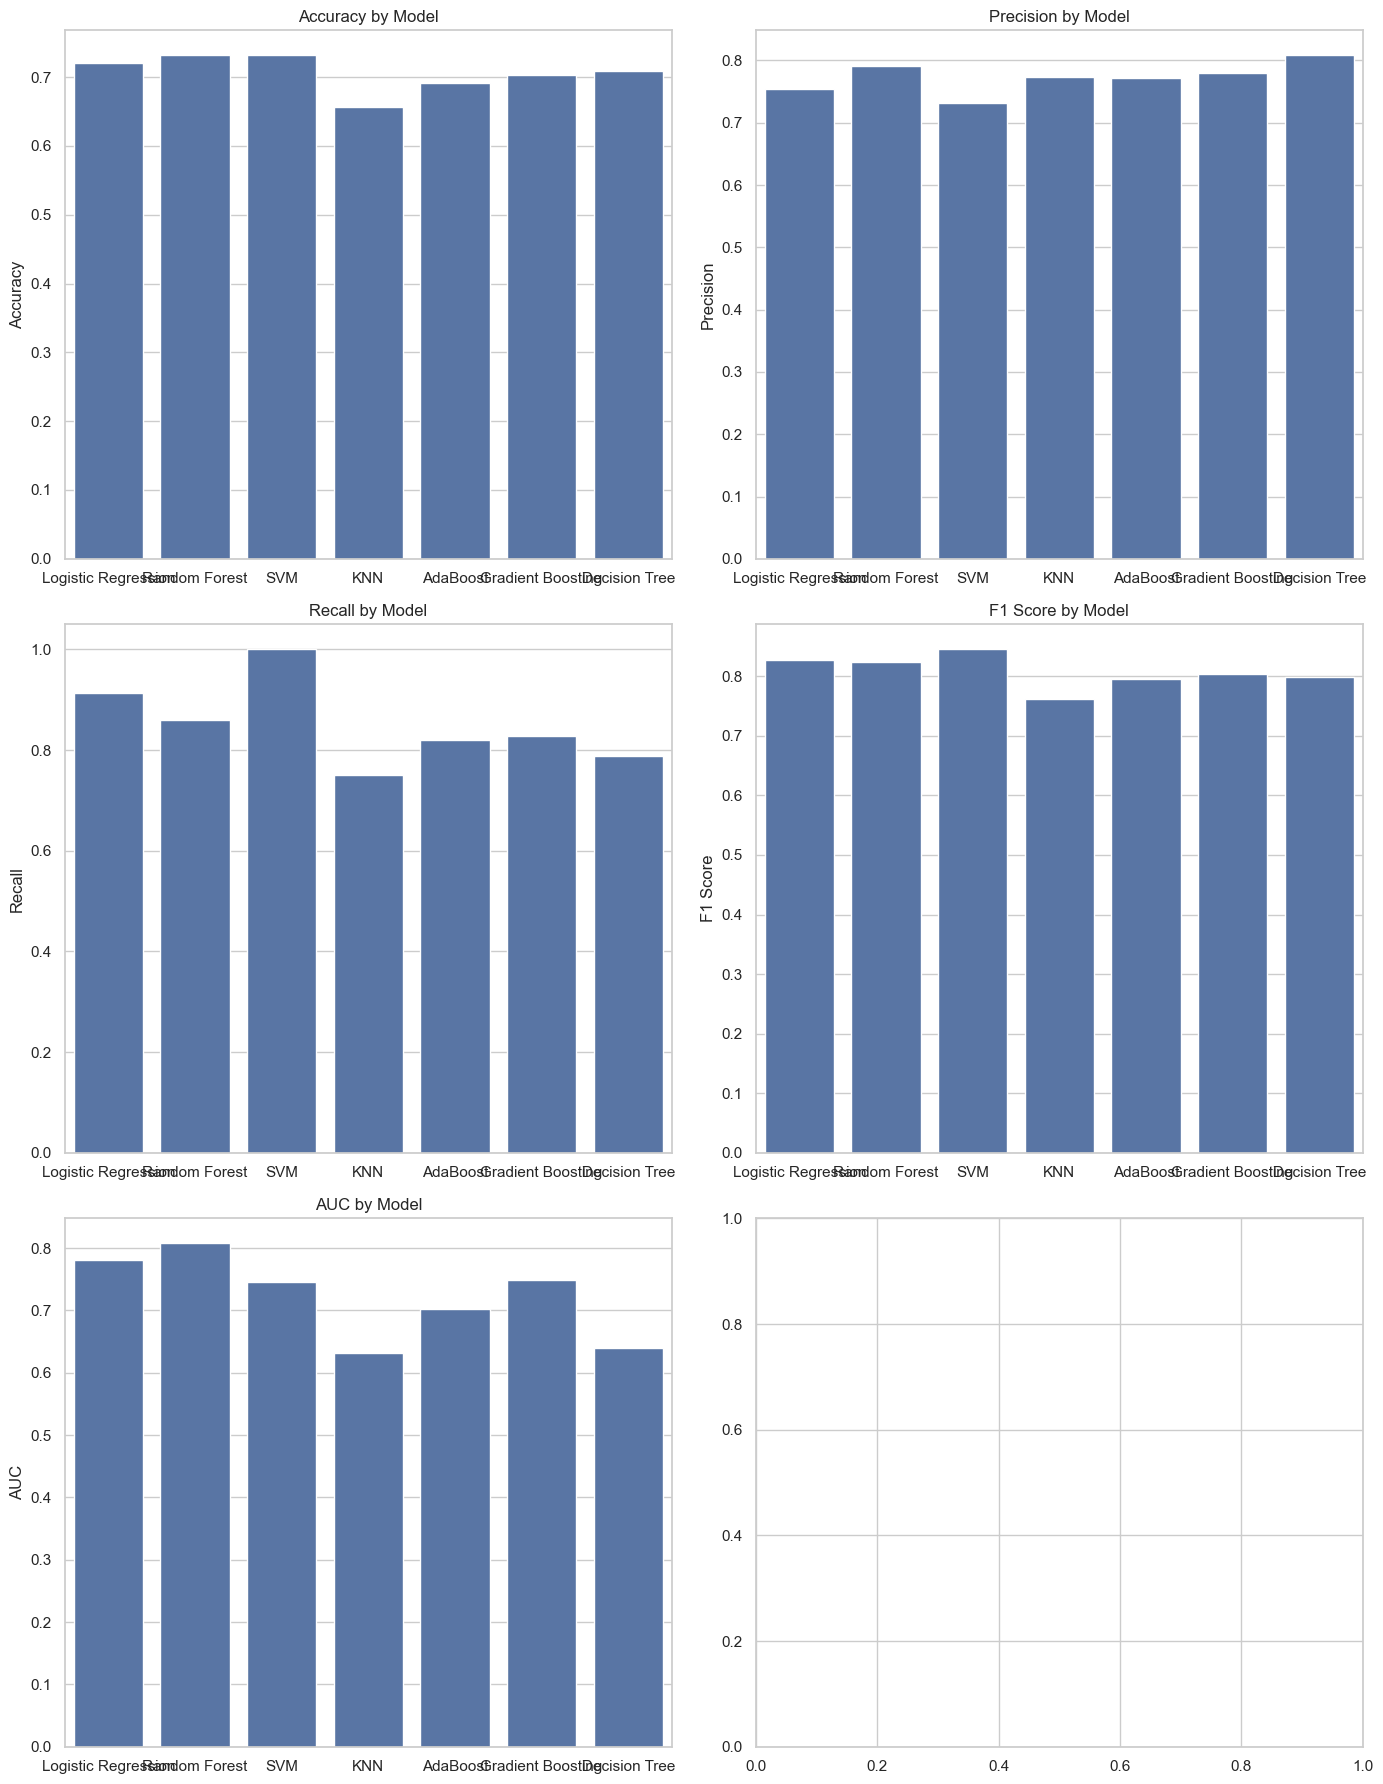

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Liver.csv')

# Encode the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Define features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Check for missing values
print(df.isnull().sum())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize a dictionary to store the evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_prob) if y_prob is not None else None)

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Set the seaborn style
sns.set(style='whitegrid')

# Create a bar plot for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
axes = axes.flatten()

for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

Based on the provided metrics, the Random Forest model seems to be the best overall for predicting liver disease.

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.720000   0.754839  0.914062  0.826855  0.781084
1        Random Forest  0.725714   0.781690  0.867188  0.822222  0.792719
2                  SVM  0.731429   0.731429  1.000000  0.844884  0.745844
3                  KNN  0.657143   0.774194  0.750000  0.761905  0.631483
4             AdaBoost  0.691429   0.772059  0.820312  0.795455  0.702793
5    Gradient Boosting  0.702857   0.779412  0.828125  0.803030  0.749169
6        Decision Tree  0.714286   0.814516  0.789062  0.801587  0.649850


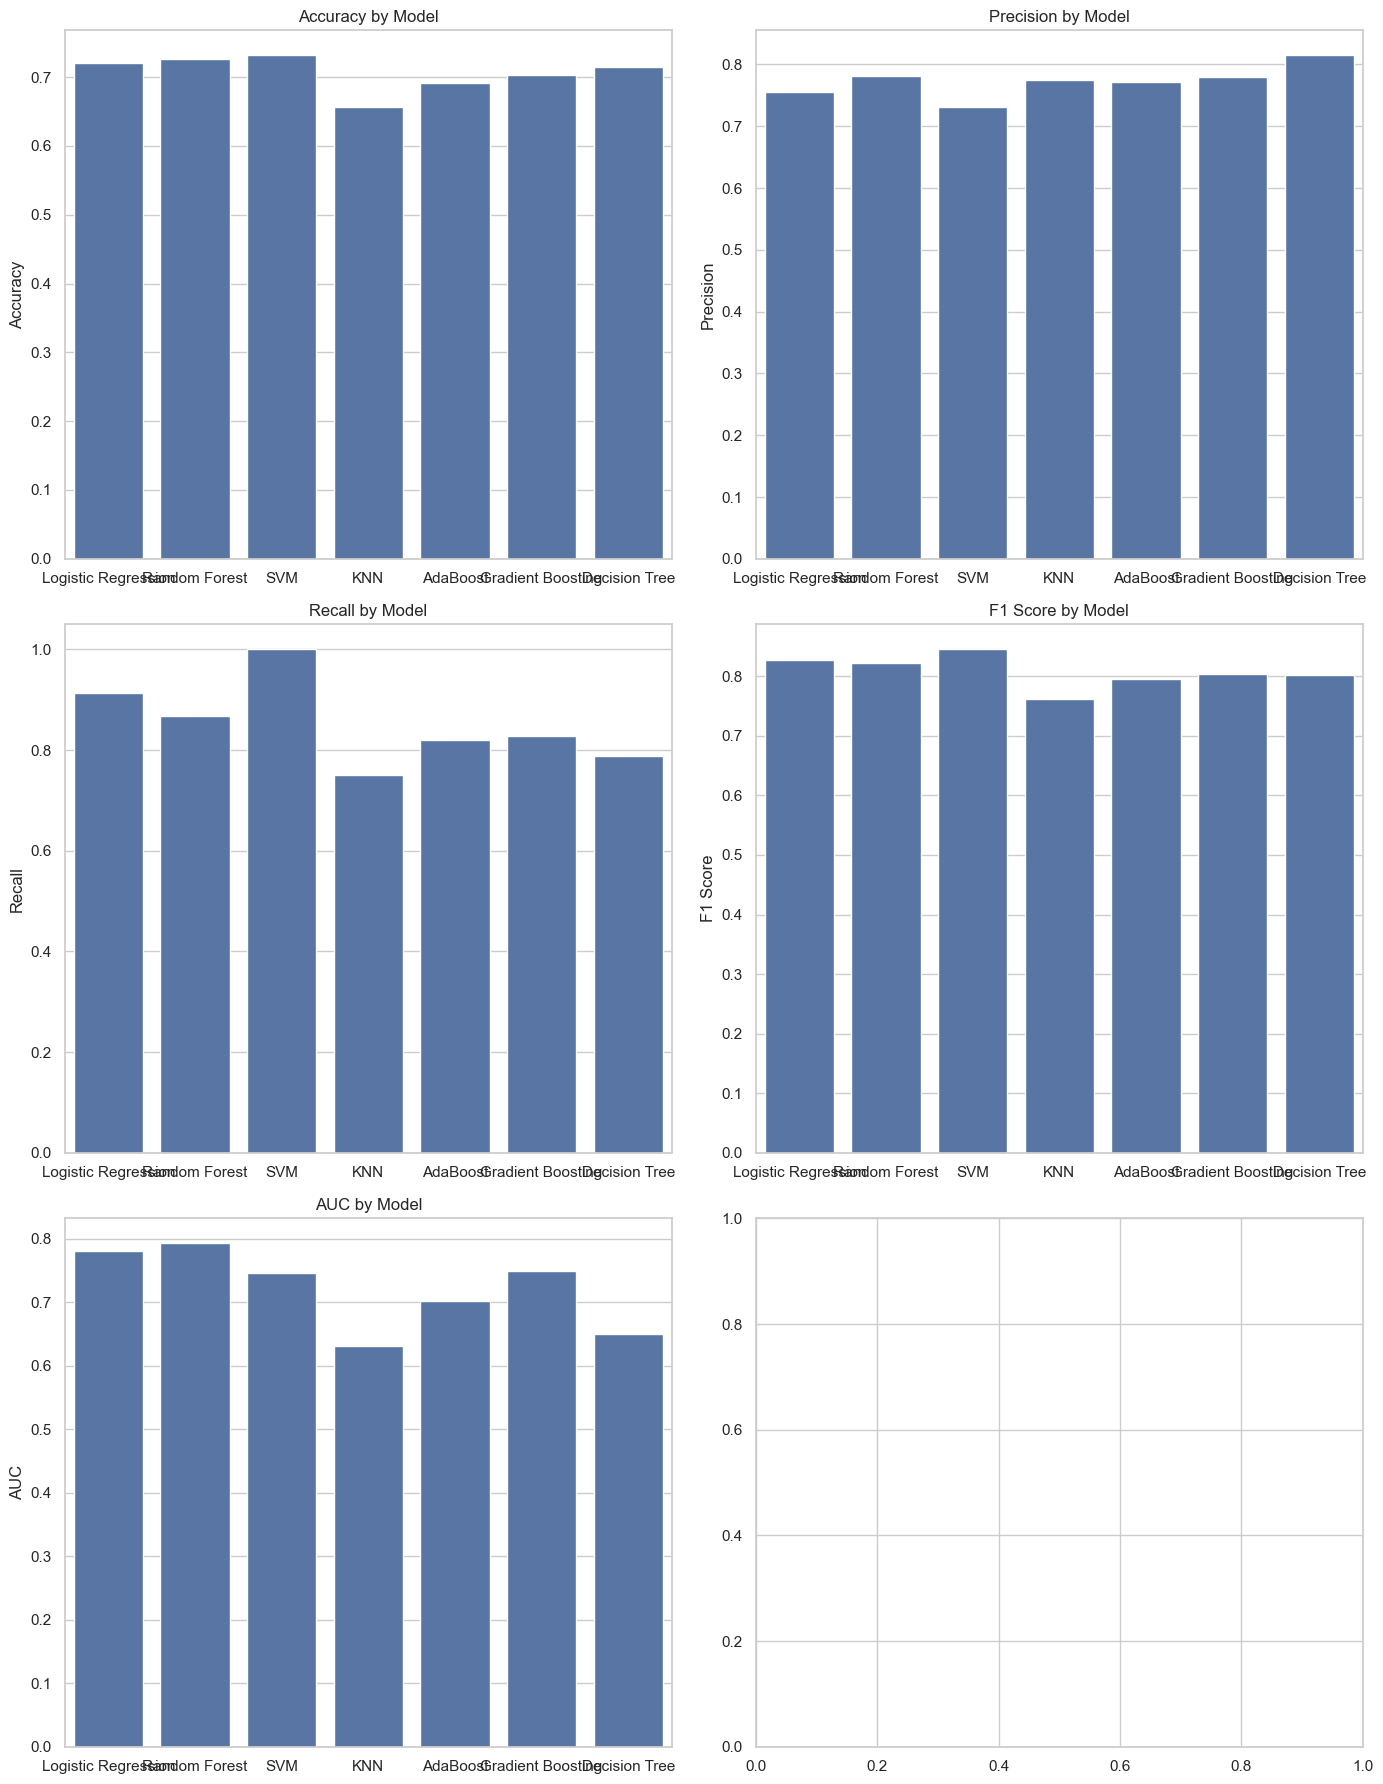

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv('Liver.csv')

# Encode the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Define features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Check for missing values
print(df.isnull().sum())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and their save paths
models = {
    'Logistic Regression': (LogisticRegression(), 'logistic_regression_model.pkl'),
    'Random Forest': (RandomForestClassifier(), 'random_forest_model.pkl'),
    'SVM': (SVC(probability=True), 'svm_model.pkl'),
    'KNN': (KNeighborsClassifier(), 'knn_model.pkl'),
    'AdaBoost': (AdaBoostClassifier(), 'adaboost_model.pkl'),
    'Gradient Boosting': (GradientBoostingClassifier(), 'gradient_boosting_model.pkl'),
    'Decision Tree': (DecisionTreeClassifier(), 'decision_tree_model.pkl')
}

# Initialize a dictionary to store the evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

# Train, evaluate, and save each model
for name, (model, file_path) in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_prob) if y_prob is not None else None)
    
    # Save the model
    joblib.dump(model, file_path)

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Set the seaborn style
sns.set(style='whitegrid')

# Create a bar plot for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
axes = axes.flatten()

for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.720000   0.754839  0.914062  0.826855  0.781084
1        Random Forest  0.720000   0.792593  0.835938  0.813688  0.790891
2                  SVM  0.731429   0.731429  1.000000  0.844884  0.745678
3                  KNN  0.657143   0.774194  0.750000  0.761905  0.631483
4             AdaBoost  0.691429   0.772059  0.820312  0.795455  0.702793
5    Gradient Boosting  0.720000   0.792593  0.835938  0.813688  0.751662
6        Decision Tree  0.697143   0.800000  0.781250  0.790514  0.624668


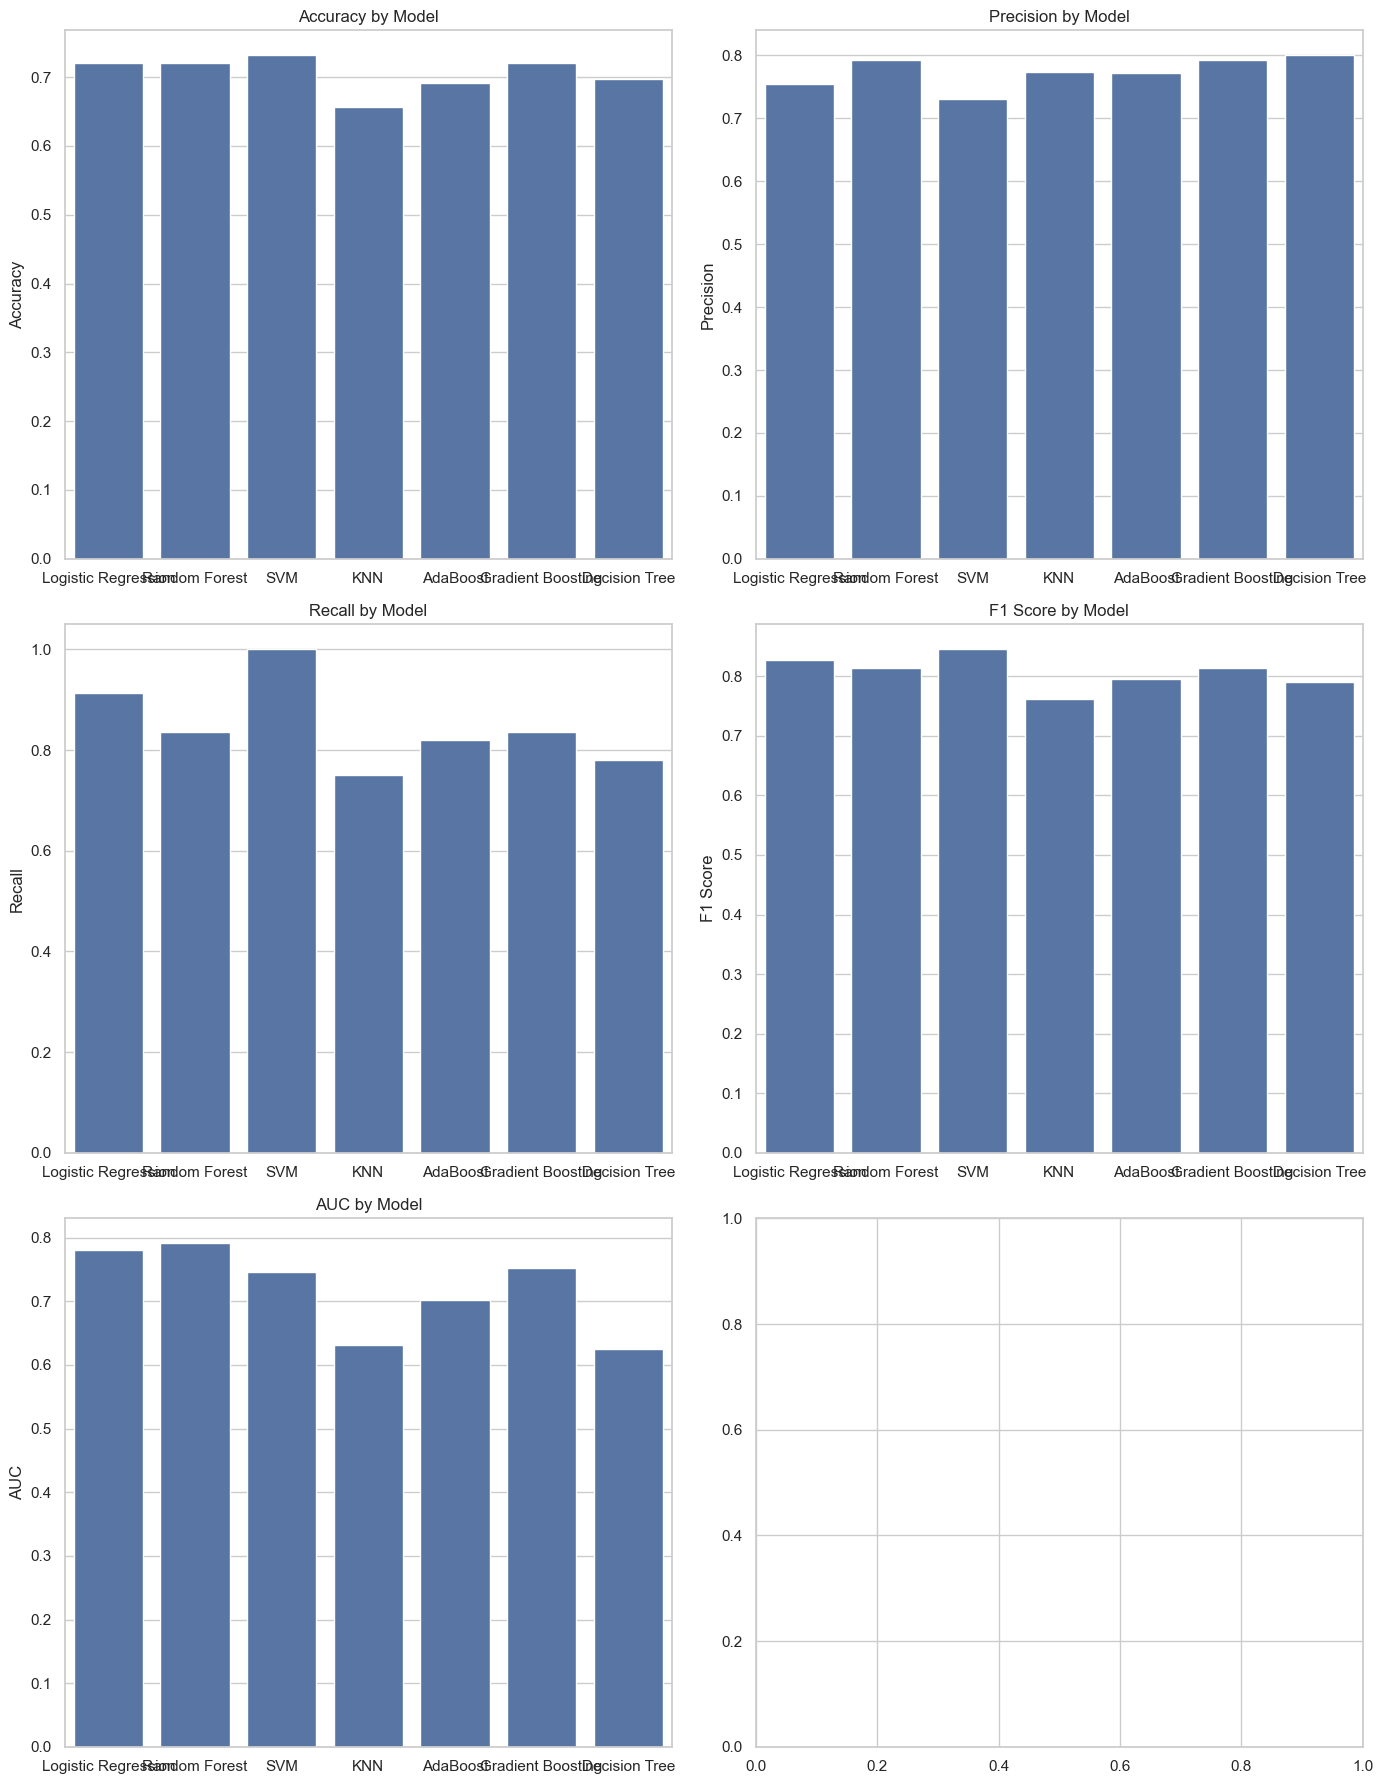

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv('Liver1.csv')  # Updated to Liver1.csv

# Encode the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Define features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Check for missing values
print(df.isnull().sum())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and their save paths
models = {
    'Logistic Regression': (LogisticRegression(), 'logistic_regression_model.pkl'),
    'Random Forest': (RandomForestClassifier(), 'random_forest_model.pkl'),
    'SVM': (SVC(probability=True), 'svm_model.pkl'),
    'KNN': (KNeighborsClassifier(), 'knn_model.pkl'),
    'AdaBoost': (AdaBoostClassifier(), 'adaboost_model.pkl'),
    'Gradient Boosting': (GradientBoostingClassifier(), 'gradient_boosting_model.pkl'),
    'Decision Tree': (DecisionTreeClassifier(), 'decision_tree_model.pkl')
}

# Initialize a dictionary to store the evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

# Train, evaluate, and save each model
for name, (model, file_path) in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_prob) if y_prob is not None else None)
    
    # Save the model
    joblib.dump(model, file_path)

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Set the seaborn style
sns.set(style='whitegrid')

# Create a bar plot for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
axes = axes.flatten()

for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')

# Adjust the layout
plt.tight_layout()
plt.show()
